In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("inc.csv")
df

,Name,Age,Inc
0,Rob,27,70000
1,Micheal,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Inc     22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


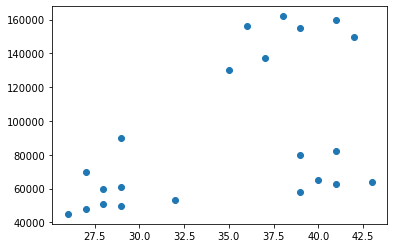

In [3]:
plt.scatter(df["Age"],df["Inc"])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_pred = km.fit_predict(df[['Age','Inc']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['cluster'] = y_pred
df.head()

,Name,Age,Inc,cluster
0,Rob,27,70000,2
1,Micheal,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No handles with labels found to put in legend.


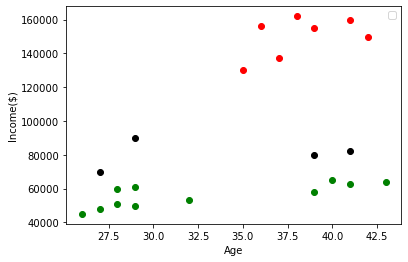

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'],df1['Inc'],color='green')
plt.scatter(df2['Age'],df2['Inc'],color='red')
plt.scatter(df3['Age'],df3['Inc'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [8]:
scaler = MinMaxScaler()
scaler.fit(df[['Inc']])
df['Inc'] = scaler.transform(df[['Inc']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Inc,cluster
0,Rob,0.058824,0.213675,2
1,Micheal,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [9]:
# so we will perform clustering again to train our model
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Inc']])
y_pred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [10]:
df['cluster'] = y_pred
df

,Name,Age,Inc,cluster
0,Rob,0.058824,0.213675,0
1,Micheal,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [11]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

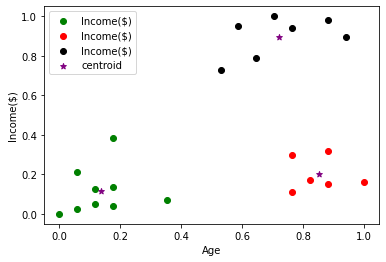

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'],df1['Inc'],color='green',label="Income($)")
plt.scatter(df2['Age'],df2['Inc'],color='red',label="Income($)")
plt.scatter(df3['Age'],df3['Inc'],color='black',label="Income($)")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [13]:
#Elbow plot technique:
k_rng = range(1,10)
sse = []
for k in k_rng:
    nkm = KMeans(n_clusters=k)
    nkm.fit(df[['Age','Inc']])
    sse.append(nkm.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


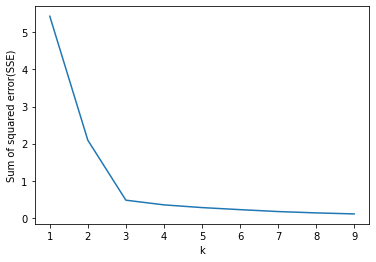

In [14]:
plt.xlabel("k")
plt.ylabel("Sum of squared error(SSE)")
plt.plot(k_rng,sse)